# **Aim of this Challenge:** 

Create intelligent question and answer systems that can reliably predict context without relying on complicated and opaque rating guidelines.

# The Business Problem:


To create a more human-like question and answering system can answer the provided question having the intuitive understanding of the question. This can attract users and address their question more human-like and this can also increase the number of user participation in the question answering forms and create human-like conversation chat boxes.


# Exploring dataset

In [ ]:
# importing the required libraries 

import pandas as pd
import  numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:
train_dataset = pd.read_csv('/kaggle/input/google-quest-challenge/train.csv')
test_dataset = pd.read_csv('/kaggle/input/google-quest-challenge/test.csv')
sample_submission_dataset = pd.read_csv('/kaggle/input/google-quest-challenge/sample_submission.csv')

print("Train shape:", train_dataset.shape)
print("Test shape:", test_dataset.shape)
print("Sample submission shape:", sample_submission_dataset.shape)

### Observations:
* In train dataset we have 41 column and 6079 rows(instances/training points).
* in test dataset we have only 11 column and 476 rows(instances/test points).
* in submission dataset we have 31 column and 476 rows.

In [ ]:
# Check for train data samples
train_dataset.head(2)

In [ ]:
# getting basic info from training data
train_dataset.info()

> **Observations:** There are 10 features and no null values and 10 are having type as object and 30 labels are having type as float64 

### Features:
 1   question_title                         
 2   question_body                           
 3   question_user_name                      
 4   question_user_page                     
 5   answer                                 
 6   answer_user_name                      
 7   answer_user_page                        
 8   url                                     
 9   category                                
 10  host      

In [ ]:
# Describing the train data
train_dataset.describe()

### **Observations:** 
* In the above 41 columns, 10 are feature and 30 are the class labels and one column qa_id is the unique ID for every instance.
* **21 class** labels are for **questions** that is the label  that starts with "question_..."
* **9 class** labels are for **answers** that is the label  which starts with "answer_..."

* Total we have **30 Class Lables**

In [ ]:
# Let's see the list of column names

list(train_dataset.columns[1:])

In [ ]:
train_dataset.head()

## Checking density of words & characters present in the `question_title` feature

In [ ]:
import seaborn as sns


def word_count(sentense):
    sentense = sentense.strip()

    return len(sentense.split(" "))


fig, ax = plt.subplots(1,2, figsize = ( 20 , 5))


question_title_lengths_train = train_dataset['question_title'].apply(len)
question_title_lengths_test = test_dataset['question_title'].apply(len)
question_title_lengths_train_words = train_dataset['question_title'].apply(word_count)
question_title_lengths_test_words = test_dataset['question_title'].apply(word_count)


sns.histplot(question_title_lengths_train, label="Train", kde=True, stat="density", linewidth=0,  color="red", ax=ax[0])
sns.histplot(question_title_lengths_test, label="Test", kde=True, stat="density", linewidth=0,  color="blue", ax=ax[0])
sns.histplot(question_title_lengths_train_words, label="Train", kde=True, stat="density", linewidth=0,  color="red", ax=ax[1])
sns.histplot(question_title_lengths_test_words, label="Test", kde=True, stat="density", linewidth=0,  color="blue", ax=ax[1])

# Set label for x-axis
ax[0].set_xlabel( "No. of characters" , size = 12 )
  
# Set label for y-axis
ax[0].set_ylabel( "Density of character" , size = 12 )
  
# Set title for plot
ax[0].set_title( "Density of characters in 'question_title' feature\n" , size = 15 )

ax[0].legend()


# Set label for x-axis
ax[1].set_xlabel( "No. of Words" , size = 12 )
  
# Set label for y-axis
ax[1].set_ylabel( "Density of Words" , size = 12 )
  
# Set title for plot
ax[1].set_title( "Density of Words in 'question_title' feature\n" , size = 15 )

ax[1].legend()



plt.show();


### Observation: 
* Both train and test having the same distribution of characters and words. 
* Most of the words lies in range 5-10 both train and test. 
* Most of the characters lies in the range 40-60 train and test. 

## Checking density of words & characters present in the `question_body` feature

In [ ]:
import seaborn as sns


def word_count(sentense):
    sentense = sentense.strip()

    return len(sentense.split(" "))


fig, ax = plt.subplots(1,2, figsize = ( 20 , 5))


question_body_lengths_train = train_dataset['question_body'].apply(len)
question_body_lengths_test = test_dataset['question_body'].apply(len)
question_body_lengths_train_words = train_dataset['question_body'].apply(word_count)
question_body_lengths_test_words = test_dataset['question_body'].apply(word_count)


sns.histplot(question_body_lengths_train, label="Train", kde=True, stat="density", linewidth=0,  color="red", ax=ax[0])
sns.histplot(question_body_lengths_test, label="Test", kde=True, stat="density", linewidth=0,  color="blue", ax=ax[0])
sns.histplot(question_body_lengths_train_words, label="Train", kde=True, stat="density", linewidth=0,  color="red", ax=ax[1])
sns.histplot(question_body_lengths_test_words, label="Test", kde=True, stat="density", linewidth=0,  color="blue", ax=ax[1])

# Set label for x-axis
ax[0].set_xlabel( "No. of characters" , size = 12 )
  
# Set label for y-axis
ax[0].set_ylabel( "Density of character" , size = 12 )
  
# Set title for plot
ax[0].set_title( "Density of characters in 'question_body' feature\n" , size = 15 )

ax[0].legend()


# Set label for x-axis
ax[1].set_xlabel( "No. of Words" , size = 12 )
  
# Set label for y-axis
ax[1].set_ylabel( "Density of Words" , size = 12 )
  
# Set title for plot
ax[1].set_title( "Density of Words in 'question_body' feature\n" , size = 15 )

ax[1].legend()



plt.show();


### Observation:
* We can observe that the distribution of both words and characters are very much right skewed.
* Most of the characters in question_body lies below 2500.
* Most of the words in question_body lies below 1000.

## Similarly we will check for `answer` feature

In [ ]:
import seaborn as sns


def word_count(sentense):
    sentense = sentense.strip()
    return len(sentense.split(" "))


fig, ax = plt.subplots(1,2, figsize = ( 20 , 5))


answer_lengths_train = train_dataset['answer'].apply(len)
answer_lengths_test = test_dataset['answer'].apply(len)
answer_lengths_train_words = train_dataset['answer'].apply(word_count)
answer_lengths_test_words = test_dataset['answer'].apply(word_count)


sns.histplot(answer_lengths_train, label="Train", kde=True, stat="density", linewidth=0,  color="red", ax=ax[0])
sns.histplot(answer_lengths_test, label="Test", kde=True, stat="density", linewidth=0,  color="blue", ax=ax[0])
sns.histplot(answer_lengths_train_words, label="Train", kde=True, stat="density", linewidth=0,  color="red", ax=ax[1])
sns.histplot(answer_lengths_test_words, label="Test", kde=True, stat="density", linewidth=0,  color="blue", ax=ax[1])

# Set label for x-axis
ax[0].set_xlabel( "No. of characters" , size = 12 )
  
# Set label for y-axis
ax[0].set_ylabel( "Density of character" , size = 12 )
  
# Set title for plot
ax[0].set_title( "Density of characters in 'answer' feature\n" , size = 15 )

ax[0].legend()


# Set label for x-axis
ax[1].set_xlabel( "No. of Words" , size = 12 )
  
# Set label for y-axis
ax[1].set_ylabel( "Density of Words" , size = 12 )
  
# Set title for plot
ax[1].set_title( "Density of Words in 'answer' feature\n" , size = 15 )

ax[1].legend()



plt.show();


### Observation:
* As similar to question_body we can find that answer distribution is also skewed.
* Their may be some extreme outlier instance that words/char length are very high in both question_body and answer features.

## Analyzing `question_body` and `answer` features sequence length

In [ ]:
for i in range(0,101,10):
    print(f'{i}th percentile of question_body input sequence {np.percentile(question_body_lengths_train_words, i)}')
print()
for i in range(90,101):
    print(f'{i}th percentile of question_body input sequence {np.percentile(question_body_lengths_train_words, i)}')
print()
for i in [99.1,99.2,99.3,99.4,99.5,99.6,99.7,99.8,99.9,100]:
    print(f'{i}th percentile of question_body input sequence {np.percentile(question_body_lengths_train_words, i)}')

## **Observation:** 99.9% the of words in question body lies below **3220**

In [ ]:
for i in range(0,101,10):
    print(f'{i}th percentile of answer input sequence {np.percentile(answer_lengths_train_words, i)}')
print()
for i in range(90,101):
    print(f'{i}th percentile of answer input sequence {np.percentile(answer_lengths_train_words, i)}')
print()
for i in [99.1,99.2,99.3,99.4,99.5,99.6,99.7,99.8,99.9,100]:
    print(f'{i}th percentile of answer input sequence {np.percentile(answer_lengths_train_words, i)}')

## **Observation:** 99.9% of words in answer feature lies below **2200**

# Analyzing `category` Feature

In [ ]:
train_dataset['category'].unique()

In [ ]:
train_category_feature_count = train_dataset['category'].value_counts()
test_category_feature_count = test_dataset['category'].value_counts()

print("Train category:\n",train_category_feature_count)
print()
print("Test category:\n",test_category_feature_count)

In [ ]:
figure, ax = plt.subplots(1,2, figsize=(12, 6))

train_category_feature_count.plot(kind='bar', ax=ax[0])
test_category_feature_count.plot(kind='bar', ax=ax[1])

ax[0].set_title('Train')
ax[0].set_xlabel( "unique category" , size = 12 )
ax[0].set_ylabel( "count" , size = 12 )

ax[1].set_title('Test')
ax[1].set_xlabel( "unique category" , size = 12 )
ax[1].set_ylabel( "count" , size = 12 )

plt.show()

In [ ]:
# Sample stack over flow question and answer
train_dataset[train_dataset['category'] == 'STACKOVERFLOW'].values[11]

In [ ]:
# sample science question and answer 
train_dataset[train_dataset['category'] == 'SCIENCE'].values[11]

In [ ]:
# sample life art and culture question and answer
train_dataset[train_dataset['category'] == 'LIFE_ARTS'].values[11]

In [ ]:
# sample life art and culture question and answer
train_dataset[train_dataset['category'] == 'CULTURE'].values[11]

### Observation:
* Five unique category are present in the category feature.
* **Technology** and **Stackoverflow** are the highest count and both are related topics.
* **Life_arts** as the lowest count category.
* Distribution of train and test category are the same.
* **Life_arts & culture** follow general english syntax & structure.
* **Science** utilizes latex with expressions prepended and appended with symbol: $
* **Technology & stackoverflow** have code snippets & logs.

# Word cloud

In [ ]:
from wordcloud import WordCloud


def plot_wordcloud(text, ax, title=None):
    wordcloud = WordCloud(max_font_size=None, background_color='white', width=1200, height=1000).generate(text)
    ax.imshow(wordcloud)
    if title is not None:
        ax.set_title(title, size = 15)
    ax.axis("off")

In [ ]:
fig, axes = plt.subplots(2, 3, figsize=(15, 10))

# word cloud for train data
text = ' '.join(train_dataset['question_title'].values)
plot_wordcloud(text, axes[0][0], 'Train Question title')

text = ' '.join(train_dataset['question_body'].values)
plot_wordcloud(text, axes[0][1], 'Train Question body')

text = ' '.join(train_dataset['answer'].values)
plot_wordcloud(text, axes[0][2], 'Train Answer')


# word cloud for Test data
text = ' '.join(test_dataset['question_title'].values)
plot_wordcloud(text, axes[1][0], 'Test Question title')

text = ' '.join(test_dataset['question_body'].values)
plot_wordcloud(text, axes[1][1], 'Test Question body')

text = ' '.join(test_dataset['answer'].values)
plot_wordcloud(text, axes[1][2], 'Test Answer')

plt.tight_layout()
fig.show()

### Observation:
* We can observe that some of words match between train and test set.
Reference: https://www.kaggle.com/corochann/google-quest-first-data-introduction?scriptVersionId=23910525&cellId=34

# Analyzing labels 

In [ ]:
for label in train_dataset.columns[11:]:
    print(f"{label:.20}: no. of unique label values: {len(train_dataset[label].unique())}")

### Observation:
* The output label are regression(real) values but the distribution is not continuous.
* Except for `answer_satisfaction` label rest every label are having unique values some are with 9 unique values and some are of 5 unique values.
* Using this insights we can use post pocessing to get better scoring 

In [ ]:
for label in train_dataset.columns[11:]:
    sns.histplot(train_dataset[label], label=label, kde=False)
    plt.show()

### Observation:
* **Label values are imbalance** like for some of the label values are having only one values ex: **question_type_spelling**, **question_not_really_question** etc that is the distribution of label are very dissimilar.

### correlation between target variables

In [ ]:
fig, ax = plt.subplots(figsize=(20,20))   
sns.heatmap(train_dataset[11:].corr(), linewidths=1, ax=ax, annot_kws={"fontsize":40})
plt.show();

### Observations:
From the above heatmap of correleation we can observe that `answer_helpful`, `answer_level_of_information`, `answer_plausible`, `answer_releveance` and `answer_satification` have some correlation between them.

## Analyzing `host` feature

In [ ]:
print(f"Total unique host present in the dataset {len(train_dataset['host'].unique())}")

In [ ]:
train_host_feature_count = train_dataset['host'].value_counts()


figure, ax = plt.subplots( figsize=(20, 5))

train_host_feature_count.plot(kind='bar', ax=ax)

ax.set_title('Train dataset - count of Q&A collected from each website', size=20)
ax.set_xlabel( "Host" , size = 12 )
ax.set_ylabel( "Count" , size = 12 )

plt.show()

In [ ]:
test_host_feature_count = test_dataset['host'].value_counts()
figure, ax = plt.subplots( figsize=(20, 5))
test_host_feature_count.plot(kind='bar', ax=ax)
ax.set_title('Test dataset - count of Q&A collected from each website', size=20)
ax.set_xlabel( "Host" , size = 12 )
ax.set_ylabel( "Count" , size = 12 )
plt.show()


### Observation:
* All question and answer in the dataset are extracted from **63 websites**.
* Most of the question and answer are from **stackoverflow.com** as we observe from the  `category` feature analysis that most of the caterogy fall under **technology and stackoverflow**.

# **Feature engineering:**

## Text count based features:

* Number of characters in the question_title
* Number of characters in the question_body
* Number of characters in the answer
* Number of words in the question_title
* Number of words in the question_body
* Number of words in the answer
* Number of unique words in the question_title
* Number of unique words in the question_body
* Number of unique words in the answer


## TF-IDF based features:

* Character Level N-Gram TF-IDF of question_title
* Character Level N-Gram TF-IDF of question_body
* Character Level N-Gram TF-IDF of answer
* Word Level N-Gram TF-IDF of question_title
* Word Level N-Gram TF-IDF of question_body
* Word Level N-Gram TF-IDF of answer


## Meta features:
* Quesiton title first word
* Question title last word
* Question body first word
* Question body last word
* Answer first word
* Answer last word
* question_user_name frequency count
* answer_user_name frequency count

## `question_user_page` and `answer_user_page` features:
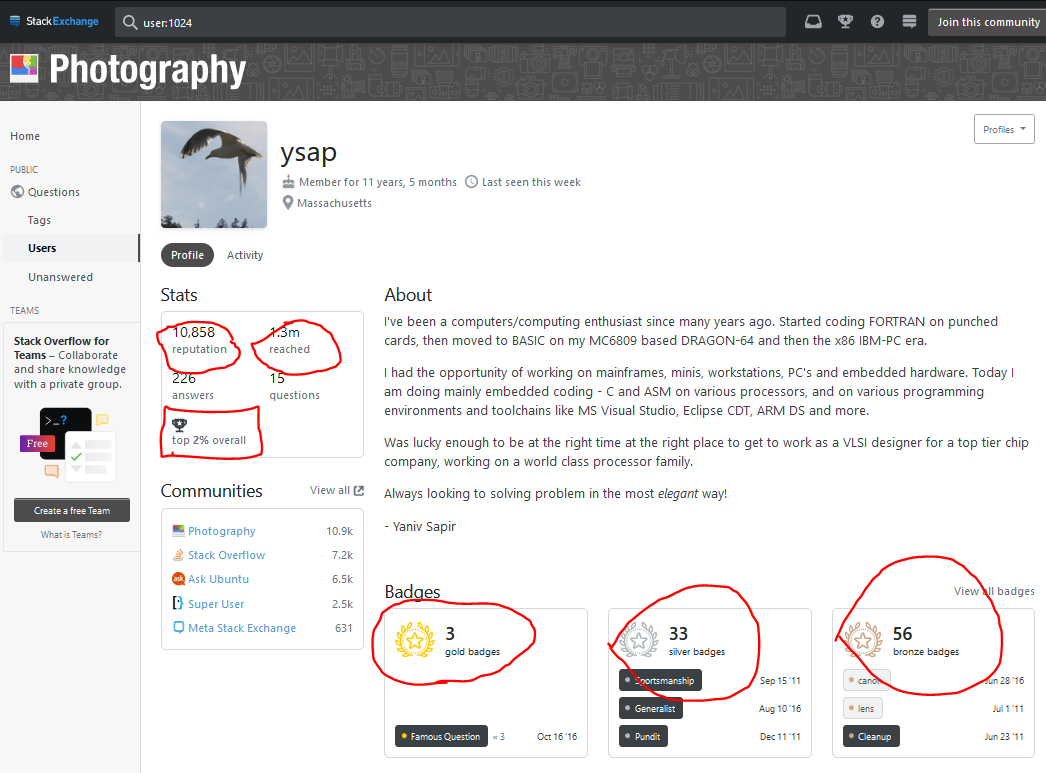

### Using the `user_page` url and with web scraping we can extract some of these use full features.

## `URL` features:

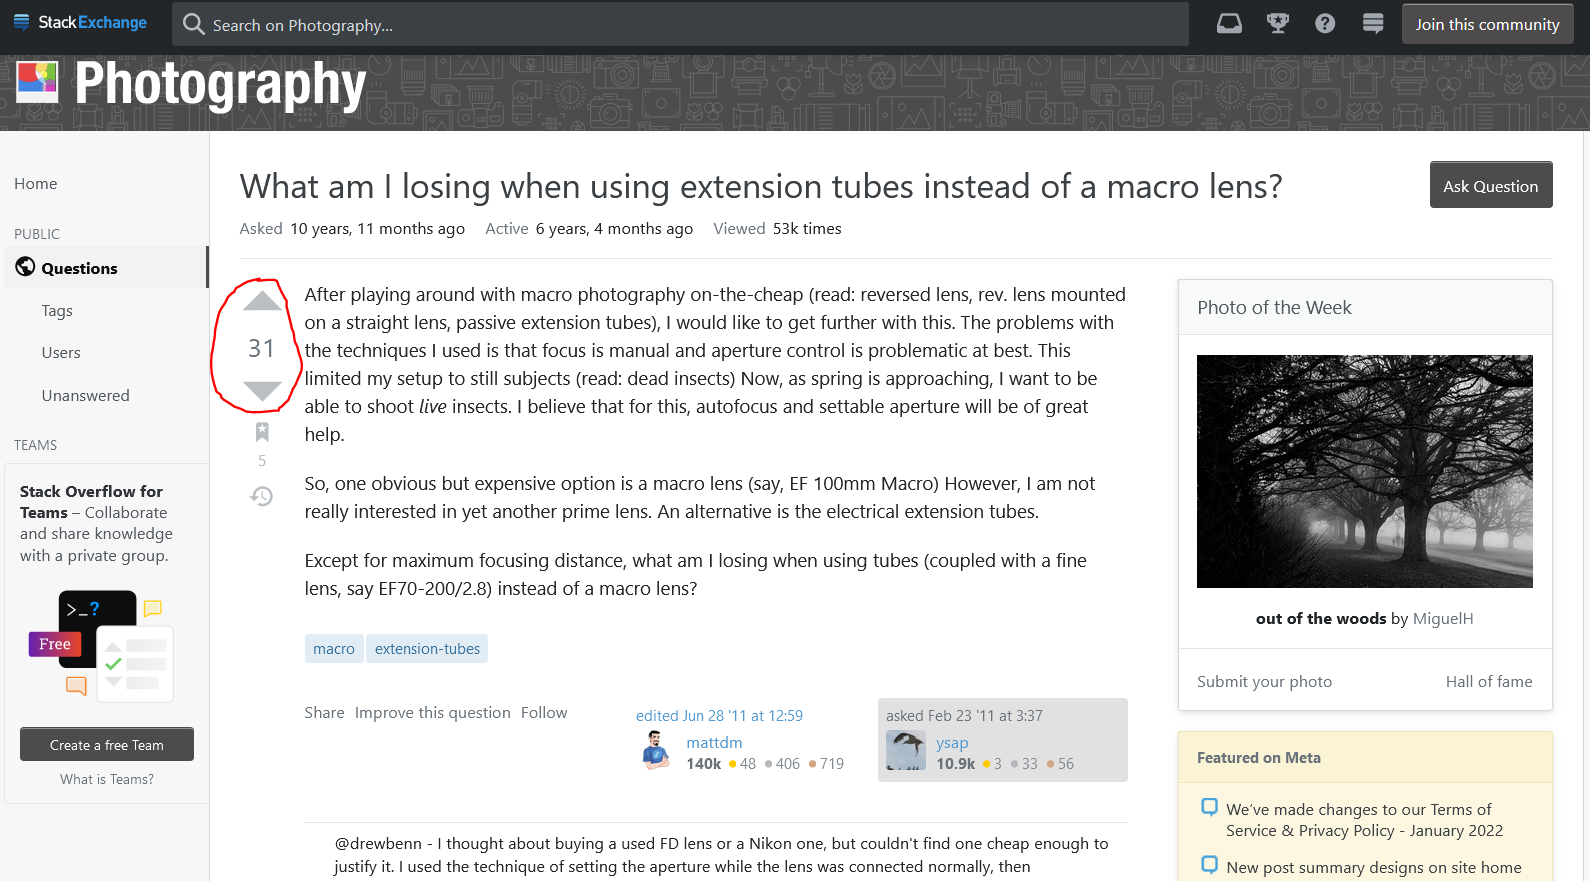

### using the `url` link with web scraping we can extract question **upvote** count and answer **upvote** count as features.

### References for feature engineering:
* https://www.kaggle.com/c/google-quest-challenge/discussion/130041 - meta features.
* https://www.kaggle.com/codename007/start-from-here-quest-complete-eda-fe?scriptVersionId=25618132&cellId=65 - tfidf, count based features.
* https://towardsdatascience.com/hands-on-transformers-kaggle-google-quest-q-a-labeling-affd3dad7bcb - web scraping features